In [112]:
!pip install gensim

In [113]:
!pip install fasttext

In [114]:
import nltk
from nltk.corpus import stopwords
import os

nltk.download('stopwords')
french_stop_words = set(stopwords.words('french'))

french_stop_words.update(
    ['.', ',', '(', ')', '\'', '-', ';', ':', '</s>', '/', '\\', '\',','d\'', 'c\'','a'])


def remove_stopwords_from_file(input_path, output_path):
    print(f"Processing {input_path}...")

    if not os.path.exists(input_path):
        print(f"❌ File not found: {input_path}")
        return

    with open(input_path, 'r', encoding='utf-8') as fin, \
            open(output_path, 'w', encoding='utf-8') as fout:

        for line in fin:
            # Split line into words (tokens)
            tokens = line.strip().split()

            # Keep only words NOT in the stop word list
            filtered_tokens = [
                t for t in tokens if t.lower() not in french_stop_words]

            # Write back to new file if the line is not empty
            if filtered_tokens:
                fout.write(" ".join(filtered_tokens) + "\n")

    print(f"✅ Created cleaned file: {output_path}")



base_dir = 'TP_ISD2020'
med_original = os.path.join(
    base_dir, 'QUAERO_FrenchMed', 'QUAERO_FrenchMed_traindev.ospl')
press_original = os.path.join(
    base_dir, 'QUAERO_FrenchPress', 'QUAERO_FrenchPress_traindev.ospl')

med_cleaned = "QUAERO_FrenchMed_cleaned.ospl"
press_cleaned = "QUAERO_FrenchPress_cleaned.ospl"

remove_stopwords_from_file(med_original, med_cleaned)
remove_stopwords_from_file(press_original, press_cleaned)

Processing TP_ISD2020/QUAERO_FrenchMed/QUAERO_FrenchMed_traindev.ospl...
✅ Created cleaned file: QUAERO_FrenchMed_cleaned.ospl
Processing TP_ISD2020/QUAERO_FrenchPress/QUAERO_FrenchPress_traindev.ospl...


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/idrissamahamoudoudicko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Created cleaned file: QUAERO_FrenchPress_cleaned.ospl


In [115]:
import logging
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

logging.basicConfig(format='%(asctime)s : %(levelname)s:%(message)s', level=logging.INFO)
corpus_med = "QUAERO_FrenchMed_cleaned.ospl"
corpus_press = "QUAERO_FrenchPress_cleaned.ospl"

DIM = 100
MIN_COUNT = 1
def train_w2v(corpus_file, model_type, name_suffix):
    print(f"--- Training {name_suffix} ({'Skkipgram' if model_type == 1 else 'CBOW'})")
    model = Word2Vec(sentences=LineSentence(corpus_file),
                     vector_size=DIM,
                     min_count = MIN_COUNT,
                     sg = model_type,
                     workers = 4)
    filename = f"w2v_{name_suffix}_{'sg' if model_type==1 else 'cbow'}.model"
    model.save(filename)
    print(f'saved:{filename}')

In [116]:

train_w2v(corpus_med, 0, "med")  # CBOW
train_w2v(corpus_med, 1, "med")  # Skipgram

2026-02-03 16:23:57,765 : INFO:collecting all words and their counts
2026-02-03 16:23:57,769 : INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2026-02-03 16:23:57,790 : INFO:collected 8935 word types from a corpus of 27959 raw words and 3021 sentences
2026-02-03 16:23:57,791 : INFO:Creating a fresh vocabulary
2026-02-03 16:23:57,826 : INFO:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 8935 unique words (100.00% of original 8935, drops 0)', 'datetime': '2026-02-03T16:23:57.826115', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'prepare_vocab'}
2026-02-03 16:23:57,826 : INFO:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 27959 word corpus (100.00% of original 27959, drops 0)', 'datetime': '2026-02-03T16:23:57.826827', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:5

--- Training med (CBOW)


2026-02-03 16:23:57,947 : INFO:deleting the raw counts dictionary of 8935 items
2026-02-03 16:23:57,949 : INFO:sample=0.001 downsamples 24 most-common words
2026-02-03 16:23:57,950 : INFO:Word2Vec lifecycle event {'msg': 'downsampling leaves estimated 26520.492016524917 word corpus (94.9%% of prior 27959)', 'datetime': '2026-02-03T16:23:57.950577', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'prepare_vocab'}
2026-02-03 16:23:58,109 : INFO:estimated required memory for 8935 words and 100 dimensions: 11615500 bytes
2026-02-03 16:23:58,110 : INFO:resetting layer weights
2026-02-03 16:23:58,132 : INFO:Word2Vec lifecycle event {'update': False, 'trim_rule': 'None', 'datetime': '2026-02-03T16:23:58.131935', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 

saved:w2v_med_cbow.model
--- Training med (Skkipgram)


2026-02-03 16:23:58,788 : INFO:EPOCH 1: training on 27959 raw words (26488 effective words) took 0.1s, 411195 effective words/s
2026-02-03 16:23:58,845 : INFO:EPOCH 2: training on 27959 raw words (26513 effective words) took 0.1s, 479618 effective words/s
2026-02-03 16:23:58,905 : INFO:EPOCH 3: training on 27959 raw words (26562 effective words) took 0.1s, 451426 effective words/s
2026-02-03 16:23:58,969 : INFO:EPOCH 4: training on 27959 raw words (26483 effective words) took 0.1s, 421254 effective words/s
2026-02-03 16:23:58,970 : INFO:Word2Vec lifecycle event {'msg': 'training on 139795 raw words (132571 effective words) took 0.3s, 439281 effective words/s', 'datetime': '2026-02-03T16:23:58.970467', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'train'}
2026-02-03 16:23:58,970 : INFO:Word2Vec lifecycle event {'params': 'Word2Vec<vocab=8935, vector_size=100, alp

saved:w2v_med_sg.model


In [117]:
train_w2v(corpus_press, 0, "press")  # CBOW
train_w2v(corpus_press, 1, "press")  # Skipgram

2026-02-03 16:23:59,009 : INFO:collecting all words and their counts
2026-02-03 16:23:59,010 : INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


--- Training press (CBOW)


2026-02-03 16:23:59,363 : INFO:PROGRESS: at sentence #10000, processed 167260 words, keeping 19798 word types
2026-02-03 16:23:59,508 : INFO:PROGRESS: at sentence #20000, processed 317317 words, keeping 28638 word types
2026-02-03 16:23:59,613 : INFO:PROGRESS: at sentence #30000, processed 485502 words, keeping 34908 word types
2026-02-03 16:23:59,700 : INFO:collected 39465 word types from a corpus of 657328 raw words and 38546 sentences
2026-02-03 16:23:59,701 : INFO:Creating a fresh vocabulary
2026-02-03 16:23:59,848 : INFO:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 39465 unique words (100.00% of original 39465, drops 0)', 'datetime': '2026-02-03T16:23:59.847988', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'prepare_vocab'}
2026-02-03 16:23:59,848 : INFO:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 657328 word corpus (10

saved:w2v_press_cbow.model
--- Training press (Skkipgram)


2026-02-03 16:24:04,892 : INFO:collected 39465 word types from a corpus of 657328 raw words and 38546 sentences
2026-02-03 16:24:04,893 : INFO:Creating a fresh vocabulary
2026-02-03 16:24:04,982 : INFO:Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 39465 unique words (100.00% of original 39465, drops 0)', 'datetime': '2026-02-03T16:24:04.982859', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'prepare_vocab'}
2026-02-03 16:24:04,983 : INFO:Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 657328 word corpus (100.00% of original 657328, drops 0)', 'datetime': '2026-02-03T16:24:04.983401', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'prepare_vocab'}
2026-02-03 16:24:05,118 : INFO:deleting the raw counts dictiona

saved:w2v_press_sg.model


In [118]:
import fasttext
def train_ft(corpus_file, name_suffix):
    print(f"-- Training FastTest CBOW on {name_suffix}")

    model = fasttext.train_unsupervised(corpus_file, model='cbow',dim=1, minCount=1)
    filename_bin = f'ft_{name_suffix}_cbow.bin'
    model.save_model(filename_bin)
    print(f"Saved: {filename_bin}")

train_ft(corpus_med, "med")
train_ft(corpus_press, "press")

Read 0M words
Number of words:  8936
Number of labels: 0


-- Training FastTest CBOW on med


Progress: 100.0% words/sec/thread:  211297 lr:  0.000000 avg.loss:  3.466300 ETA:   0h 0m 0s


Saved: ft_med_cbow.bin
-- Training FastTest CBOW on press


Read 0M words
Number of words:  39466
Number of labels: 0
Progress: 100.0% words/sec/thread:  263267 lr:  0.000000 avg.loss:  2.591134 ETA:   0h 0m 0s


Saved: ft_press_cbow.bin


In [119]:
from gensim.models import KeyedVectors
import pandas as pd

words = ['patient', 'traitement', 'maladie', 'solution', 'jaune']

def get_neighbors(model, word, approach_name):
    try:
        if hasattr(model, 'wv'):
            neighbors = model.wv.most_similar(word, topn=5)
        elif hasattr(model, 'get_nearest_neighbors'):
            neighbors = [(w,s) for s, w in model.get_nearest_neighbors(word, k=5)]
        else:
            return "Error"
    except KeyError:
        return "Word not found"

In [120]:
import pandas as pd
from gensim.models import Word2Vec
import fasttext

# Load Models (Ensure these variables are active in memory)
w2v_med_cbow = Word2Vec.load("w2v_med_cbow.model")
w2v_med_sg = Word2Vec.load("w2v_med_sg.model")
w2v_press_cbow = Word2Vec.load("w2v_press_cbow.model")
w2v_press_sg = Word2Vec.load("w2v_press_sg.model")

# Load FastText (Re-loading to be safe)
ft_med = fasttext.load_model("ft_med_cbow.bin")
ft_press = fasttext.load_model("ft_press_cbow.bin")


def get_neighbors_safe(model, word):
    """
    Robust function to get neighbors.
    Returns the error message if something fails.
    """
    try:
        # GENSIM (Word2Vec)
        if hasattr(model, 'wv'):
            # Check if word is in vocab first
            if word not in model.wv.key_to_index:
                return "Not in Vocab"
            neighbors = model.wv.most_similar(word, topn=5)
            return ", ".join([n[0] for n in neighbors])

        # FASTTEXT (Library object)
        elif hasattr(model, 'get_nearest_neighbors'):
            neighbors = model.get_nearest_neighbors(word, k=5)
            # FastText returns (score, word), we want just the word
            return ", ".join([n[1] for n in neighbors])

        else:
            return "Unknown Model Type"

    except Exception as e:
        return f"Error: {str(e)}"


# Run Comparison
words = ['patient', 'traitement', 'maladie', 'solution', 'jaune']
results = []

for word in words:
    entry = {"Word": word}
    entry["Med (W2V-CBOW)"] = get_neighbors_safe(w2v_med_cbow, word)
    entry["Med (W2V-SG)"] = get_neighbors_safe(w2v_med_sg, word)
    entry["Med (FT)"] = get_neighbors_safe(ft_med, word)
    entry["Press (W2V-CBOW)"] = get_neighbors_safe(w2v_press_cbow, word)
    entry["Press (FT)"] = get_neighbors_safe(ft_press, word)
    results.append(entry)

df = pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)

try:
    display(df)
except:
    print(df)

2026-02-03 16:24:17,667 : INFO:loading Word2Vec object from w2v_med_cbow.model
2026-02-03 16:24:17,681 : INFO:loading wv recursively from w2v_med_cbow.model.wv.* with mmap=None
2026-02-03 16:24:17,682 : INFO:setting ignored attribute cum_table to None
2026-02-03 16:24:17,755 : INFO:Word2Vec lifecycle event {'fname': 'w2v_med_cbow.model', 'datetime': '2026-02-03T16:24:17.754956', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'loaded'}
2026-02-03 16:24:17,770 : INFO:loading Word2Vec object from w2v_med_sg.model
2026-02-03 16:24:17,777 : INFO:loading wv recursively from w2v_med_sg.model.wv.* with mmap=None
2026-02-03 16:24:17,778 : INFO:setting ignored attribute cum_table to None
2026-02-03 16:24:17,831 : INFO:Word2Vec lifecycle event {'fname': 'w2v_med_sg.model', 'datetime': '2026-02-03T16:24:17.831834', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forg

,Word,Med (W2V-CBOW),Med (W2V-SG),Med (FT),Press (W2V-CBOW),Press (FT)
0,patient,"’, risque, étude, 1, 6","risque, cours, •, symptômes, étude","chez, cas, bénéfique, Plaidoyer, dyslexie","histoires, photos, style, maman, salaire","euh, plus, ire, noeuds, anticycloniques"
1,traitement,"’, chez, après, médecin, mg","médecin, TYSABRI, cas, après, si","chez, patients, bénéfique, Plaidoyer, dyslexie","préfère, bois, envoie, équilibre, totalement","euh, plus, ire, noeuds, anticycloniques"
2,maladie,"’, cours, mg, traitement, chez","cours, risque, étude, ?, après","chez, cas, bénéfique, Plaidoyer, dyslexie","achat, effectifs, pratiquement, Serbes, créé","euh, plus, ire, noeuds, anticycloniques"
3,solution,"mg, flacon, traitement, 1, ’","flacon, 100, 20, contient, mg","chez, cas, bénéfique, Plaidoyer, dyslexie","liberté, désir, morale, donnera, légitimité","euh, plus, ire, noeuds, anticycloniques"
4,jaune,"triphosphate, nausées, 2010, Méthionine, {","type, syndrome, Etude, entre, deux","chez, cas, bénéfique, Plaidoyer, dyslexie","station, Sydney, recueilli, réalisation, Maurice","euh, plus, ire, noeuds, anticycloniques"


In [121]:
import numpy as np
import os
from gensim.models import Word2Vec

# --- 1. Helper Functions ---


def load_corpus_sentences(file_path):
    """
    Reads file and returns list of sentences (list of lists of tokens).
    """
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    sentences = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            tokens = line.strip().split()
            if tokens:
                sentences.append(tokens)
    return sentences


def get_sentence_embeddings(model, sentences):
    """
    Converts text sentences to a list of numpy arrays (Sentence_Len x 100).
    """
    embedded_data = []
    dim = model.vector_size

    for sentence in sentences:
        sentence_vectors = []
        for word in sentence:
            if word in model.wv.key_to_index:
                sentence_vectors.append(model.wv[word])
            else:
                # Handle OOV (Out Of Vocabulary) with zeros
                sentence_vectors.append(np.zeros(dim))

        if sentence_vectors:
            embedded_data.append(np.array(sentence_vectors))
        else:
            embedded_data.append(np.zeros((0, dim)))

    return embedded_data


# --- 2. Load Models & Data ---

print("Loading models...")
# Ensure these model files exist in your directory
w2v_med_cbow = Word2Vec.load("w2v_med_cbow.model")
w2v_med_sg = Word2Vec.load("w2v_med_sg.model")
w2v_press_cbow = Word2Vec.load("w2v_press_cbow.model")
w2v_press_sg = Word2Vec.load("w2v_press_sg.model")

print("Loading corpora text...")
sentences_med = load_corpus_sentences("QUAERO_FrenchMed_cleaned.ospl")
sentences_press = load_corpus_sentences("QUAERO_FrenchPress_cleaned.ospl")

# --- 3. Process & Save Medical Corpus ---

print("\n--- Processing Medical Corpus ---")
X_med_cbow = get_sentence_embeddings(w2v_med_cbow, sentences_med)
X_med_sg = get_sentence_embeddings(w2v_med_sg, sentences_med)

print("Saving Medical .npy files...")
# We use dtype=object because sentences have different lengths
np.save("embeddings_med_cbow.npy", np.array(X_med_cbow, dtype=object))
np.save("embeddings_med_sg.npy", np.array(X_med_sg, dtype=object))

# --- 4. Process & Save Press Corpus ---

print("\n--- Processing Press Corpus ---")
# Warning: This might take more RAM. If it crashes, slice sentences_press[:20000]
X_press_cbow = get_sentence_embeddings(w2v_press_cbow, sentences_press)
X_press_sg = get_sentence_embeddings(w2v_press_sg, sentences_press)

print("Saving Press .npy files...")
np.save("embeddings_press_cbow.npy", np.array(X_press_cbow, dtype=object))
np.save("embeddings_press_sg.npy", np.array(X_press_sg, dtype=object))

print("\n✅ All files saved successfully.")

2026-02-03 16:24:18,819 : INFO:loading Word2Vec object from w2v_med_cbow.model
2026-02-03 16:24:18,826 : INFO:loading wv recursively from w2v_med_cbow.model.wv.* with mmap=None
2026-02-03 16:24:18,826 : INFO:setting ignored attribute cum_table to None
2026-02-03 16:24:18,873 : INFO:Word2Vec lifecycle event {'fname': 'w2v_med_cbow.model', 'datetime': '2026-02-03T16:24:18.873722', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'loaded'}
2026-02-03 16:24:18,875 : INFO:loading Word2Vec object from w2v_med_sg.model
2026-02-03 16:24:18,879 : INFO:loading wv recursively from w2v_med_sg.model.wv.* with mmap=None
2026-02-03 16:24:18,879 : INFO:setting ignored attribute cum_table to None
2026-02-03 16:24:18,926 : INFO:Word2Vec lifecycle event {'fname': 'w2v_med_sg.model', 'datetime': '2026-02-03T16:24:18.926711', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forg

Loading models...


2026-02-03 16:24:19,152 : INFO:Word2Vec lifecycle event {'fname': 'w2v_press_cbow.model', 'datetime': '2026-02-03T16:24:19.152093', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'loaded'}
2026-02-03 16:24:19,155 : INFO:loading Word2Vec object from w2v_press_sg.model
2026-02-03 16:24:19,176 : INFO:loading wv recursively from w2v_press_sg.model.wv.* with mmap=None
2026-02-03 16:24:19,177 : INFO:setting ignored attribute cum_table to None
2026-02-03 16:24:19,379 : INFO:Word2Vec lifecycle event {'fname': 'w2v_press_sg.model', 'datetime': '2026-02-03T16:24:19.379679', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'loaded'}


Loading corpora text...

--- Processing Medical Corpus ---
Saving Medical .npy files...

--- Processing Press Corpus ---
Saving Press .npy files...

✅ All files saved successfully.


In [122]:
import numpy as np

# Load one of your saved files
data = np.load("embeddings_med_cbow.npy", allow_pickle=True)

print("--- Data Structure Inspection ---")
print(f"Total Sentences: {len(data)}")
print(f"First Sentence (Vectors): {data[0].shape}")  # (Number of words, 100)

# Print the first word of the first sentence
print("\nFirst word vector (First 20 dimensions):")
print(data[0][0][:20])

--- Data Structure Inspection ---
Total Sentences: 3021
First Sentence (Vectors): (3, 100)

First word vector (First 20 dimensions):
[ 6.6150543e-03 -5.1684808e-03  1.0843173e-02 -7.4749123e-03
  6.2128403e-03  6.5720556e-03 -2.9907431e-03 -5.9215701e-03
  3.7510305e-05  1.2508131e-06 -9.1812182e-03 -9.6411882e-03
 -5.5397199e-03  1.3585401e-03 -8.3965883e-03 -5.5102487e-03
 -2.3928657e-03 -3.1597272e-03  7.3384782e-03  2.4022167e-03]


2026-02-03 16:24:28,364 : INFO:loading Word2Vec object from w2v_med_cbow.model
2026-02-03 16:24:28,372 : INFO:loading wv recursively from w2v_med_cbow.model.wv.* with mmap=None
2026-02-03 16:24:28,373 : INFO:setting ignored attribute cum_table to None
2026-02-03 16:24:28,423 : INFO:Word2Vec lifecycle event {'fname': 'w2v_med_cbow.model', 'datetime': '2026-02-03T16:24:28.423652', 'gensim': '4.4.0', 'python': '3.13.1 | packaged by conda-forge | (main, Jan  8 2025, 09:15:59) [Clang 18.1.8 ]', 'platform': 'macOS-26.1-arm64-arm-64bit-Mach-O', 'event': 'loaded'}


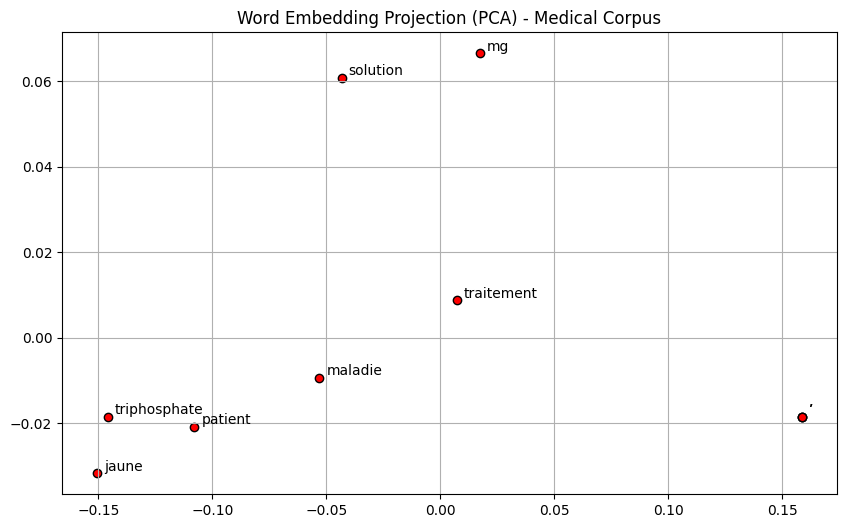

In [123]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from gensim.models import Word2Vec

# Load a model (e.g., Medical CBOW)
model = Word2Vec.load("w2v_med_cbow.model")

# Words to visualize (Target words + some random context words)
target_words = ["patient", "traitement", "maladie", "solution", "jaune"]
# Add top neighbors to see clusters
all_words = target_words + [
    model.wv.most_similar(w, topn=1)[0][0] for w in target_words if w in model.wv
]

# Extract vectors
vectors = []
labels = []

for word in all_words:
    if word in model.wv:
        vectors.append(model.wv[word])
        labels.append(word)

# Reduce to 2 Dimensions using PCA
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c="red", edgecolors="k")

for i, label in enumerate(labels):
    plt.annotate(
        label,
        (reduced_vectors[i, 0], reduced_vectors[i, 1]),
        xytext=(5, 2),
        textcoords="offset points",
    )

plt.title("Word Embedding Projection (PCA) - Medical Corpus")
plt.grid(True)
plt.show()